In [1]:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
import numpy as np # linear algebra
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

DATA = pd.read_csv("input/data.csv")
target_name = 'quality'

print('Done')

Done



# Exploring the Data, planning the preprocessing


Data Overview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

/Users/kkepins-macwro_1/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Correlations >= 0.3:

fixed acidity:

volatile acidity:

citric acid:
 - fixed acidity: 0.67
 - volatile acidity: -0.55

residual sugar:

chlorides:

free sulfur dioxide:

total sulfur dioxide:
 - free sulfur dioxide: 0.67

density:
 - fixed acidity: 0.67
 - citric acid: 0.36
 - residual sugar: 0.36

pH:
 - fixed acidity: -0.68
 - citric acid: -0.54
 - density: -0.34

sulphates:
 - citric acid: 0.31
 - chlorides: 0.37

alcohol:
 - density: -0.50

quality:
 - volatile acidity: -0.39
 - alcohol: 0.48
Done


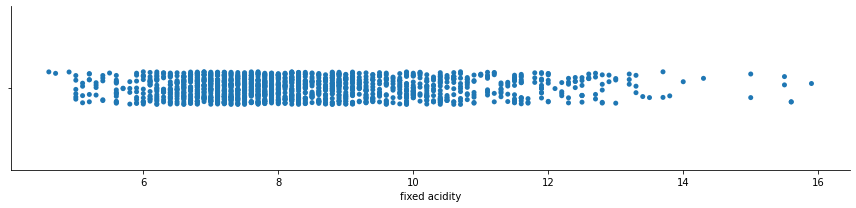

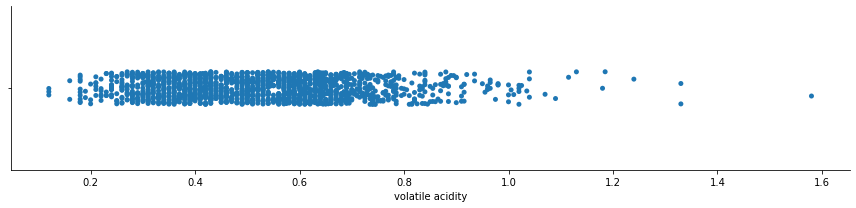

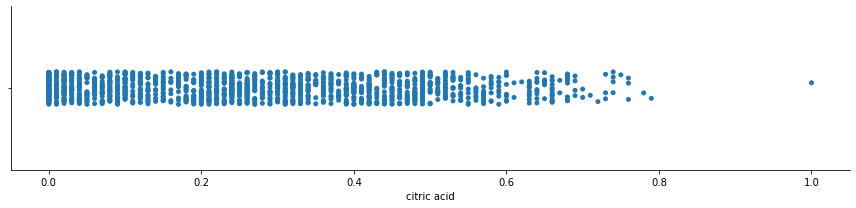

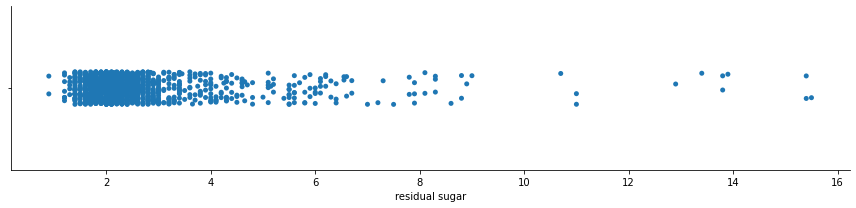

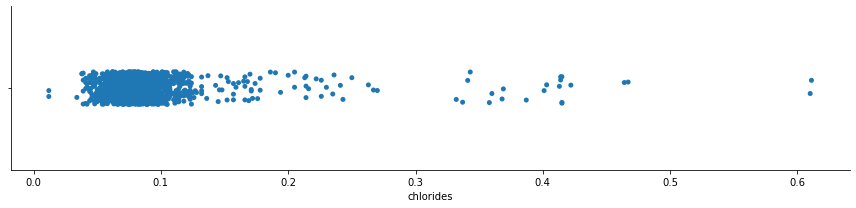

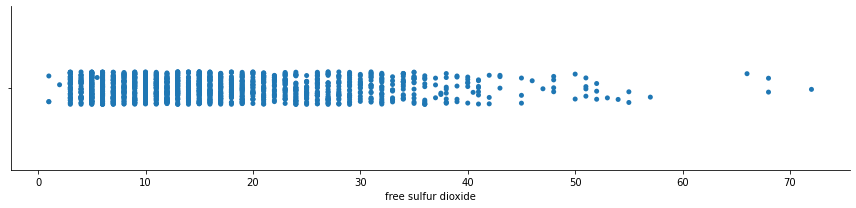

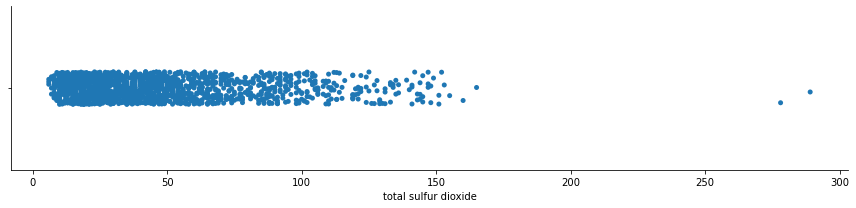

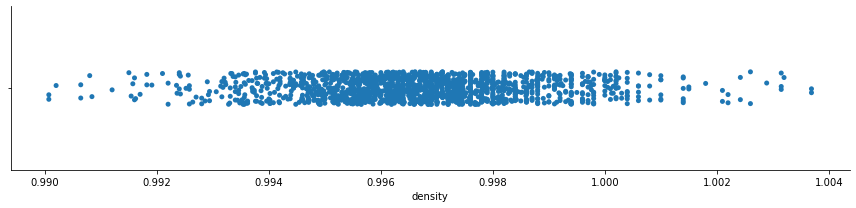

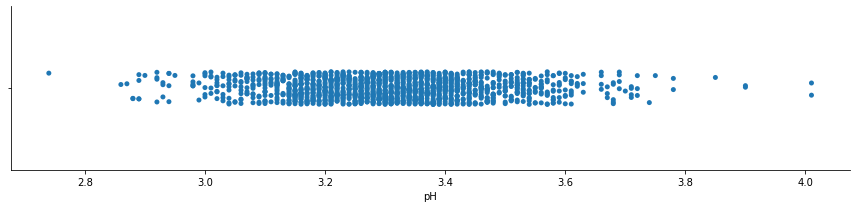

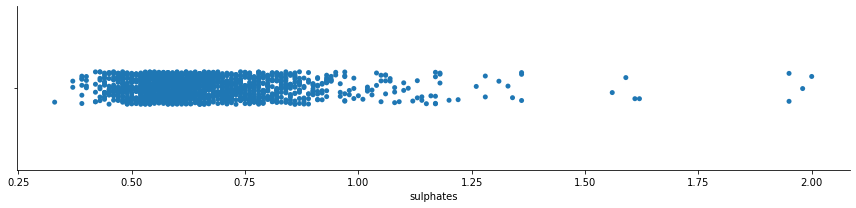

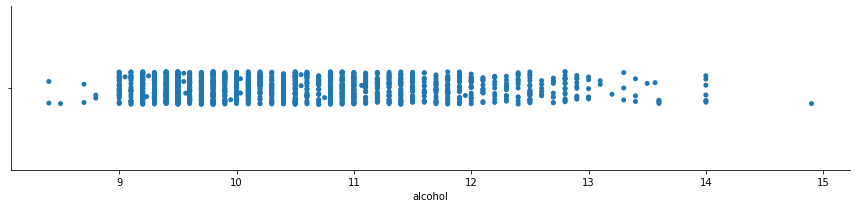

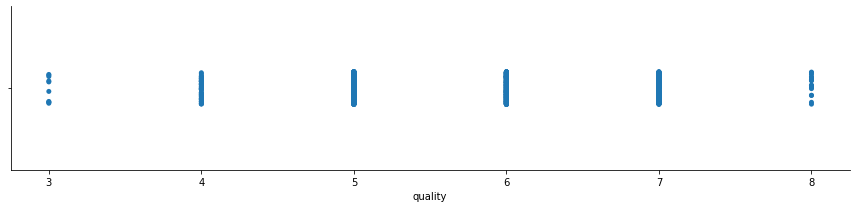

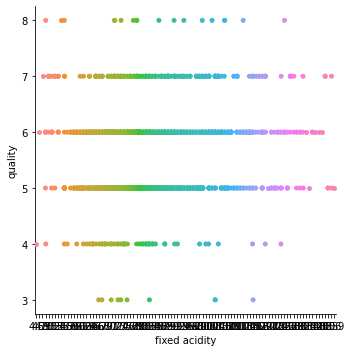

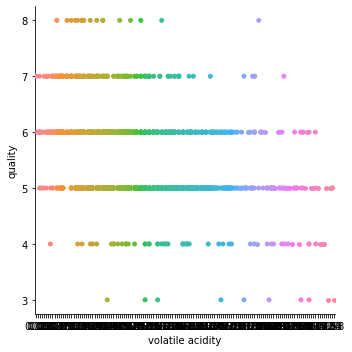

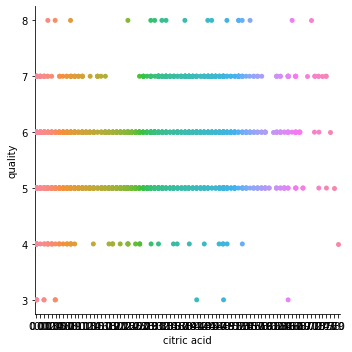

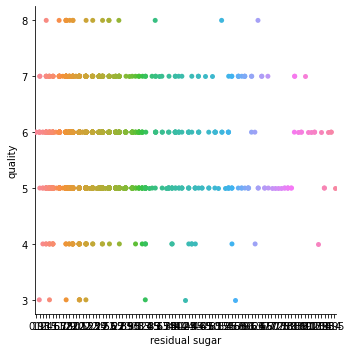

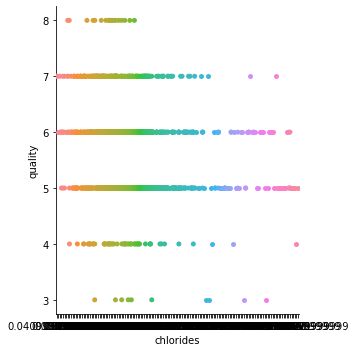

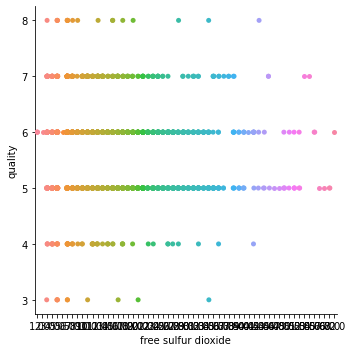

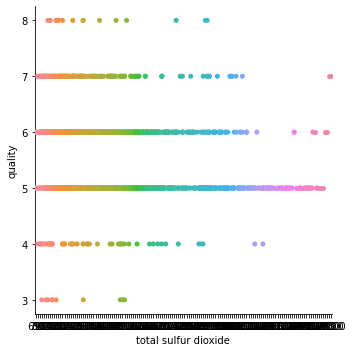

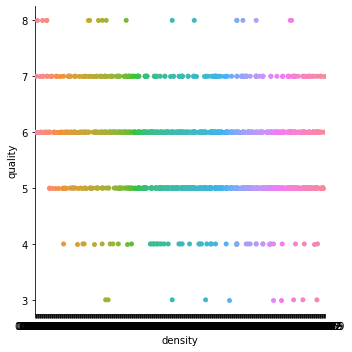

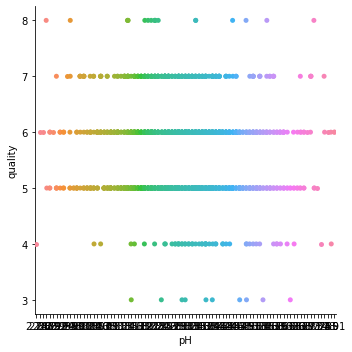

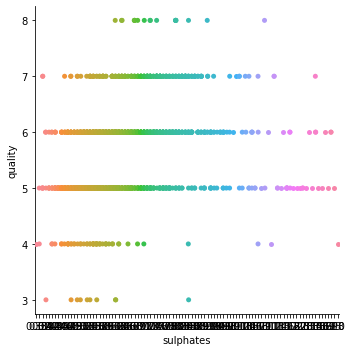

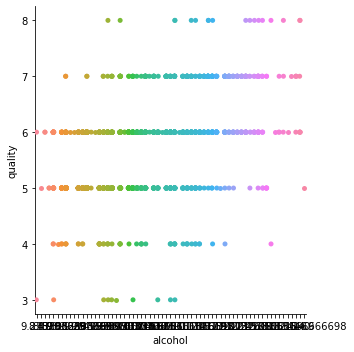

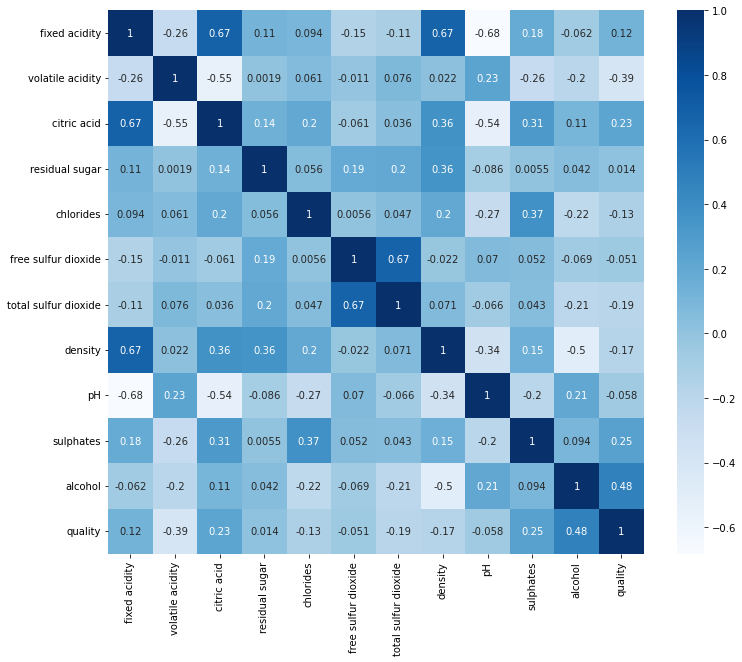

In [2]:
from libs.simple_analyzer import print_analytics
print_analytics(DATA, target_name)

TypeError: simple_correlations() missing 1 required positional argument: 'target_name'

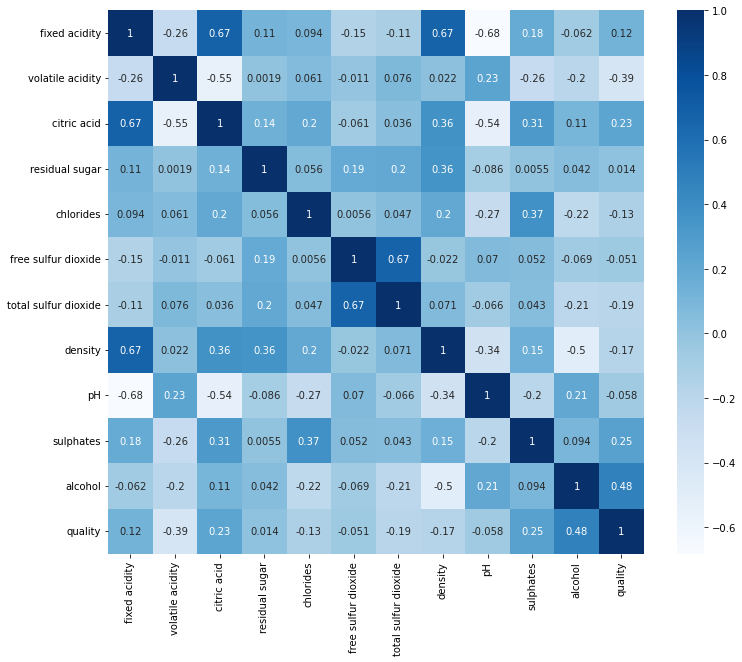

In [3]:
# Data Pre-processing
from libs.simpleplotter import simple_heatmap
from libs.simple_analyzer import simple_correlations
simple_heatmap(DATA)
simple_correlations(DATA)

In [ ]:
# Let's run the preprocessing on both train and test data
from libs.simple_processing import normalize, separate_target, dropna_rows, remove_columns

# DATA = remove_columns(DATA, ['citric acid'])
# DATA = remove_columns(DATA, ['density'])
# DATA = remove_columns(DATA, ['pH'])

X, y = separate_target(DATA, target_name)
X = dropna_rows(X, X.columns)

# Data Normalization
X = normalize(X)
# X_train.head()
print("Done")

# Data Categorization


In [ ]:
X.columns
# from libs.simple_processing import categorize
# X_train, X_valid = categorize(X_train, X_valid)
# print("Done")

as we can see the number of records in train data is lowered

In [ ]:
# from libs.simpleplotter import simple_heatmap
# simple_heatmap(X)
from libs.simple_analyzer import simple_correlations
simple_correlations(X, 0.25)

In [ ]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview

winner = quick_gridsearchcv_overview(X, y, [5])

# Models Training & Hyper-params Tuning for Different Classification Models


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from libs.simple_processing import get_model_name, print_scores
from pandas import DataFrame
from sklearn.gaussian_process import GaussianProcessClassifier
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from libs.simple_hyper_tuner import gridsearchcv_tuner
from xgboost import XGBClassifier

params = [

    # model = XGBClassifier(n_estimators=150, learning_rate=0.08, max_depth=7, num_parallel_tree=10,
    #                       use_label_encoder=False, eval_metric='error')
    #

#     Validation Results:
# - Accuracy score:  0.75
# - Accuracy count:  240 / 320
# - Precision score:  0.7304975616265528
# - Recall score:  0.75
# - F1 score:  0.7384216566992439
# Params:
# - cv:  5
#        - Splitter Params:  {'train_size': 0.8, 'random_state': 50}
#                            - Model Params:  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
#                                                           colsample_bynode=None, colsample_bytree=None,
#                                                           enable_categorical=False, gamma=None, gpu_id=None,
#                                                           importance_type=None, interaction_constraints=None,
#                                                           learning_rate=0.08, max_delta_step=None, max_depth=7,
#                                                           min_child_weight=None, missing=nan, monotone_constraints=None,
#                                                           n_estimators=150, n_jobs=None, num_parallel_tree=10,
#                                                           predictor=None, random_state=None, reg_alpha=None,
#                                                           reg_lambda=None, scale_pos_weight=None, subsample=None,
#                                                           tree_method=None, validate_parameters=None, verbosity=None)
#                                             - Best H-Params:  {'max_depth': 8, 'n_estimators': 70}

    {
        'splitter': {'train_size': [0.8], 'random_state': [50]},
        'cv': [10],
        'model': RandomForestClassifier(
            # criterion='gini'
            # max_depth=14, n_estimators=160
            # , random_state=0, max_leaf_nodes=19
            # max_depth=8, max_features="auto"
            # , bootstrap=True, oob_score=True, random_state=0
            # , criterion='entropy', n_estimators=110
        ),
        'hyperparams': {
                    # 'max_features':["auto", "sqrt", "log2"],
                    # 'max_samples': range(0, 40, 5),
                    # 'n_estimators': range(155, 175, 5),
                    # 'max_depth': range(10, 15, 1)
        }
    },
    {
        'splitter': {'train_size': [0.8], 'random_state': [50]},
        'cv': [10],
        'model': XGBClassifier(
            n_estimators=70, learning_rate=0.08, max_depth=8, num_parallel_tree=10
            # , min_samples_leaf=1, min_samples_split=3
        #   use_label_encoder=False,
        #     , eval_metric='error'
            # , max_leaf_nodes=1, validation_fraction=0
            # , tol=0, ccp_alpha=0, n_iter_no_change=1
        ),
        'hyperparams': {
             # 'n_estimators':range(100, 160, 10)
            # 'min_samples_split':np.arange(3, 6, 1),
            # 'min_samples_leaf':np.arange(1, 4, 1),
            # 'subsample':np.arange(0.6, 0.9, 0.1),
            # 'criterion': ['friedman_mse', 'squared_error'],
            # , 'max_depth': range(5, 9, 1)
            # , 'learning_rate':np.arange(0.09, 0.13, 0.01)
            # , 'min_weight_fraction_leaf':np.arange(0, 0.14, 0.02)
            # , 'min_impurity_decrease':np.arange(0, 0.14, 0.02)
            # 'max_leaf_nodes':range(1, 7, 1)
            # , 'warm_start': [True, False]
            # 'validation_fraction': np.arange(0, 0.005, 0.001)
            'tol': np.arange(0, 0.005, 0.001)
            # 'ccp_alpha': np.arange(0, 0.005, 0.001)
            # 'n_iter_no_change':range(1, 7, 1)

        }
    }
]
# categorization, train-test splitting, grid-search with cross-validation and printing scores.
winner = gridsearchcv_tuner(X, y, params, 0)

In [ ]:
from libs.simple_processing import categorize
from libs.simple_hyper_tuner import predict_print_valid_scores
from libs.simpleplotter import simple_confusion_matrix

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=50)
X_train, X_valid = categorize(X_train, X_valid)

model = XGBClassifier(
    n_estimators=70, learning_rate=0.08, max_depth=8, num_parallel_tree=10
)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print("Validation Results:")
f1 = predict_print_valid_scores(model, X_valid, y_valid)

print("Done")

In [ ]:
from libs.simple_processing import categorize
from libs.simple_hyper_tuner import predict_print_valid_scores
from libs.simpleplotter import simple_roc
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=50)
X_train, X_valid = categorize(X_train, X_valid)

model = GradientBoostingClassifier(max_depth=7, learning_rate=0.11, n_estimators=35, loss='deviance', max_features='log2', random_state=30, n_iter_no_change=1)
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# simple_roc(y_valid, y_pred)

print("Validation Results:")
f1 = predict_print_valid_scores(model, X_valid, y_valid)

# simple_confusion_matrix(y_valid, y_pred, winner.classes_)

print("Done")


In [ ]:
output = pd.DataFrame({'y_valid': y_valid, 'y_pred': y_pred})
output


In [ ]:
from libs.simpleplotter import simple_confusion_matrix

simple_confusion_matrix(y_valid, y_pred, winner.classes_)

## Score


In [ ]:
# BEST params:  {'n_estimators': 110, 'bootstrap': False, 'max_depth': 9}
# => train data: 0.934 val data: 0.731
# {
#     'modelName': globals()["RandomForestClassifier"],
#     'hyperParamNames': ['n_estimators', 'bootstrap', 'max_depth'],
#     'hyperParamValues': [range(80, 140, 10), [True, False], range(7, 10, 1)],
#     'params': {'random_state': 0, "n_jobs": 3, 'criterion': 'gini', 'max_leaf_nodes': 19}
# }
model = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=110, n_jobs=3, random_state=0, max_leaf_nodes=19)
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

In [ ]:
from libs.simpleplotter import decision_tree
model = DecisionTreeClassifier( )
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))
# decision_tree(model, X_train)

In [ ]:
# BEST params:  {'n_estimators': 130, 'learning_rate': 0.8999999999999999, 'max_depth': 11}
# => train data: 1.000 val data: 0.738
model = GradientBoostingClassifier(max_features="auto", learning_rate=1.2, max_depth=6, n_estimators=80)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))


# Winner

In [ ]:
model = GradientBoostingClassifier(max_features="auto", criterion='mse', learning_rate=0.7, max_depth=11, n_estimators=90, random_state=6)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))


## Receiver Operating Characteristic (ROC)

In [ ]:
from libs.simpleplotter import simple_roc

simple_roc(y_valid, y_pred)

## Confusion Matrix / Macierz pomyłek

In [ ]:
from libs.simpleplotter import simple_confusion_matrix
conf_matrix = simple_confusion_matrix(y_valid, y_pred, model.classes_)

## Which features became decision makers for the model?

In [ ]:
from libs.simpleplotter import feature_importance

feature_importance(winner, X_train)

# Generating Model Predictions For Test Data & Saving the results for Kaggle Competition

In [ ]:
# y_pred = winner.predict(X)
# output = pd.DataFrame({'Id': Ids, 'Species': y_pred})
#
# print_scores(y, y_pred)
# output.to_csv('./submission.csv', index=False)
# SUBMISSION = pd.read_csv("./submission.csv")
# SUBMISSION